<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/kn_lab56_topic_modeling_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽모델링 (LDA)
- 주어진 문서의 주제(카테고리)를 구분 - 비지도 학습
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)
- LDA(Latent Dirichlet Allocation) 사용하여 관련된 단어나 문서의 집합을 찾는다. 관련성이 높은 단어들이 발생하면 같은 토픽으로 분류.
- 각 문서들의 토픽들이 디리클레 분포를 따른다고 가정.
- 문서마다 토픽이 어떻게 분포되어 있는지, 그리고 토픽마다 단어의 분포가 어떻게 되어 있는지 파악, 토픽에 따라 단어의 분포를 결정하고 그 중 가장 확률이 높은 단어를 선택.
- LDA:
  - 말뭉치로부터 대표적인 토픽 선정
  - 해당 토픽으로부터 단어들을 뽑아 문서를 생성


In [ ]:
!pip install konlpy

In [ ]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Twitter

In [ ]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

--2021-01-06 14:28:09--  https://bit.ly/2QA9xhg
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2021-01-06 14:28:10--  https://www.dropbox.com/s/yj1gxuy0hkjwjpu/news_1500.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx [following]
--2021-01-06 14:28:11--  https://www.dropbox.com/s/raw/yj1gxuy0hkjwjpu/news_1500.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53f758c67d82f1f0a3b7e570f2.dl.dropboxusercontent.com/cd/0/inline/BGc1KoEEYB7VmWXtjEa2-_4oIc0LgB-sShf5bXSb9A

In [ ]:
df_train = pd.read_excel('news_1500.xlsx', names=['기사'], 
                         keep_default_na=False) # no strings parsed as NaN values 
#Countvectorizer적용을 위해 list로 변환
list_train = df_train['기사'].tolist()

In [ ]:
df_train.head(3)

,기사
0,호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드...
1,호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소...
2,\n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n ...


In [ ]:
list_train[:5], len(list_train)

(['호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드라나 충격을 주고 있다. \n \n20일 호주 국영 ABC방송은 퀸즐랜드주 경찰이 김모(28)씨를 살해하고 암매장한 혐의로\xa0한국인 홍모(28)씨를\xa0체포했다고 보도했다. \n \n경찰에 따르면 홍씨는\xa0지난 16일 오후 브리즈번 캐넌힐에서 1만 5000 호주달러를 원화로 환전해줄 사..',
  '호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소했다고 호주 언론이 보도했다. \n \n퀸즐랜드주 경찰은 20일(현지시간) 금품을 빼앗기 위해 김민태(28)씨를 살해한 혐의로 황모(28)씨를 기소했다고 시드니모닝헤럴드가 보도했다. \n \n그는 이날 브리즈번 법원에서 열린 심리에 출석해 기자들로부터 고개를 돌린 채 아래쪽만 쳐..',
  '\xa0 \n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n \n최근 각종 온라인 커뮤니티 게시판에는 ‘호주 괴물 가재’라는 제목의 사진 한 장이 게재됐다. \n \n공개된 사진에는 웬만한 성인 남성 팔 크기와 비슷한 가재의 모습이 담겨 있다. 사진 속 남성도 가재가 무거운지 엉거주춤한 자세를 취하고 있다. 호주에서 잡힌 것으로 알려진 가재의..',
  '최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고 다른 프로그램의 화면이 나오는 등 방송사고를 냈다. \n▶ 방송사고 이후 사과 자막이 나오는 tvN ‘응답하라 1994’의 한 장면.20일 밤 10시쯤 드라마 ‘응답하라 1994’가 방송되는 도중에 방송사고가 발생했다. 이날 방송에서 성나정이 호주로 떠났다가 한국으로 돌아..',
  '호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서 한국인 여대생이 무참히 살해된 지 한 달도 지나지 않아 발생한 이번 사건으로 호주 교민사회 및 어학연수 희망자들의 불안감이 커지고 있다. \n \n호주 ABC방송 등에 따르면 퀸

In [ ]:
twitter = Twitter()
results = []
for line in list_train:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
results[0]

'호주 브리즈번 발생 한국인 워킹홀리데이 참가자 살해 범 같다 한국인 것 드라 충격 있다 20일 호주 국영 ABC 방송 퀸즐랜드 주 경찰 김모 28 씨 살해 암매장 혐의 \xa0 한국인 홍모 28 씨 \xa0 체포 보도 경찰 홍씨 \xa0 지난 16일 오후 브리즈번 캐넌 힐 1만 5000 호주달러 원화로 환전 사'

## LatentDirichletAllocation
- https://wikidocs.net/30708
- 

In [ ]:
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".

vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
document_topics.shape

(1499, 10)

In [ ]:
document_topics[0]

array([0.0028581 , 0.00285819, 0.00285742, 0.3137773 , 0.00285793,
       0.66336031, 0.00285772, 0.00285763, 0.00285744, 0.00285798])

- components_[i, j] can be viewed as pseudocount that represents the number of times (word j was assigned to topic i). 
-  It can also be viewed as distribution over the words for each topic after normalization:

In [ ]:
lda.components_.shape

(10, 10000)

In [ ]:
lda.components_[0]

array([0.1       , 0.1       , 1.10000029, ..., 0.1       , 0.1       ,
       0.1       ])

In [ ]:
lda.components_.argsort(axis=1)[:,::-1]

array([[4166, 6205, 5187, ..., 6066, 5206, 8109],
       [4339, 9353, 7862, ..., 5982, 5206, 8109],
       [2554, 4573, 4202, ..., 5982, 6066, 8109],
       ...,
       [2499, 2554, 4655, ..., 6066, 5206, 8109],
       [3471, 3823, 2499, ..., 6066, 5206, 8109],
       [5945, 8843, 6884, ..., 5982, 6066, 5206]])

In [ ]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [ ]:
lda.components_[0][0]

0.10000000009604379

In [ ]:
lda.components_.shape

(10, 10000)

In [ ]:
N = 10 # number of words to print for each topic
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

topic 0:
['박태환' '올림픽' '수영' '출전' '리우' '국가대표' '27' '정부' '선수' '대학']
topic 1:
['보도' '필리핀' '지역' '통해' '결과' '정부' '같다' '발견' '조사' '방송']
topic 2:
['국제' '사드' '발표' '개최' '내년' '독도' '평화' '위성' '소녀' '기업']
topic 3:
['리그' '포켓몬' '축구' 'acl' '감독' '게임' '시즌' '해밍턴' '지난해' '전북']
topic 4:
['올림픽' '경기' '대표팀' '예선' '대회' '시드니' '오후' '2016' '출전' '리우']
topic 5:
['축구' '브라질' '월드컵' '선수' 'fifa' '본선' '대표팀' '연맹' '2014' '국제']
topic 6:
['골프' '투어' '프로' '대회' '여자' '랭킹' 'lpga' '상금' '라운드' 'pga']
topic 7:
['국가' '국제' '삼성' '대만' '2013' '해외' '시리즈' '대통령' '정보' '보도']
topic 8:
['대통령' '마약' '국가' '개국' '없다' '20' '개발' '전자' '유엔' '우리나라']
topic 9:
['여성' '통화' '일리' '시드니' '수출' '메일' '해외' '밉다' '정부' '소녀']


In [ ]:
### text 에 있는 포맷 ###
# 10개의 토픽을 출력합니다
%matplotlib inline
import matplotlib.pyplot as plt

def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


In [ ]:
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, 
             topics_per_chunk=4, n_words=10)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
박태환           보도            국제            리그            
올림픽           필리핀           사드            포켓몬           
수영            지역            발표            축구            
출전            통해            개최            acl           
리우            결과            내년            감독            
국가대표          정부            독도            게임            
27            같다            평화            시즌            
정부            발견            위성            해밍턴           
선수            조사            소녀            지난해           
대학            방송            기업            전북            


topic 4       topic 5       topic 6       topic 7       
--------      --------      --------      --------      
올림픽           축구            골프            국가            
경기            브라질           투어            국제            
대표팀           월드컵           프로            삼성            
예선            선수            대

In [ ]:
# 100개 토픽 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
엘니뇨           위해            사이트           태풍            리그            
피해자           남중국해          경쟁            이름            전북            
옥스팜           보도            이행            의미            축구            
보고서           페이스북          도박            손흥민           연맹            
2013          커플            수준            독일            acl           
트러블메이커        인도            포트            지역            챔피언스리그        
노예            합동            발표            매장            클래식           
wff           순찰            국가            물이            현대            
가장            이케아           등급            게시            서울            
항공            방송            서울대           말레이시아         시즌            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
브라질 

In [ ]:
document_topics100.shape

(1499, 100)

In [ ]:
document_topics100[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.972, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [ ]:
np.argsort(document_topics100[:, 77])[::-1]

array([  26,  428,  273, ...,  839, 1193,  805])

In [ ]:
# 관련 토픽 77를 가중치로 정렬합니다
topic77 = np.argsort(document_topics100[:, 77])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in topic77[:5]:
    # 첫 두 문장을 출력합니다
    print(list_train[i], "\n")

해외 한국인 유학생 수가 6년 연속 20만 명 이상을 기록하면서 어학연수 해외유학 교환학생 교수 해외 주재원 등 소량화물이사 운송 서비스의 수요가 크게 늘고 있다. 
 
한국교육개발원과 교육부 등에서 집계한 해외 유학생 현황 통계자료(2012년 기준)에 따르면, 국외 한국인 유학생 수는 2007년 처음으로 20만 명 이상을 돌파한 이래 여전히 높은 수치.. 

화학무기 참사가 발생한 시리아에 대한 공습이 초읽기에 들어갔다는 관측 속에 미국의 움직임이 긴박하다.미국은 버락 오바마 대통령을 비롯해 척 헤이글 국방장관, 존 케리 국무장관 등 국방 안보 라인이 모두 나서 주요 우방과 전방위로 접촉하며 군사 행동에 착수할  경우에 대비한 공조 체제 가동 등의 약속을 받아내고 있다.오바마 대통령은 27일(현지시간) 케빈.. 

윤상직 산업통상자원부 장관은 14일 미국 주도의 다자 FTA(자유무역협정)인 환태평양경제동반자협정(TPP) 참여 문제와 관련, "가입 여부 자체를 확정하지 않았다"고 말했다.윤 장관은 이날 정부과천청사에서 진행된 국회 산업통상자원위의 산업부 국정감사 답변을 통해 이같이 밝혔다고 연합뉴스가 전했다. 윤 장관은 한-중 FTA와의 연관성에 대한 질의에는 "별.. 

동북아허브 공항을 표방하고 있는 인천국제공항의 경쟁력이 세계 최하위 수준으로 나타났다. 
 
한국 항공사의 정시운항률 역시 세계 최하위권이라 항공산업 전반의 경쟁력 제고가 시급하다는 지적이다. 
 
11일 글로벌 항공정보 제공업체 OAG(Official Airline Guide)가 최근 공개한 ‘OAG 메가허브 2016’에 따르면 인천공항은 조사대상 세.. 

일본과 호주의 국방장관이 25일 양국 안보협력을 강화하기로 했으며 중국의 해양 진출이 인근 지역 긴장을 고조시킨다는데 의견을 함께했다고 일본 언론이 보도했다. 
 
보도에 따르면 이나다 도모미(稻田朋美) 방위상은 이날 일본을 방문 중인 머리스 페인 호주 국방장관과 만나 상호군수지원협정(ACSA) 개정 협의를 가속하기로 했다. 
 
이는

In [ ]:
#한글 폰트 설치 (should restart the kernel after installing)

import matplotlib
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
matplotlib.font_manager._rebuild()


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetyp

In [ ]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    # rc('font', family='NanumBarunGothic')
    rc('font', family='NanumBarunGothic')
else:
    print('system error...')

In [ ]:
sorting

array([[8043, 3815, 2365, ..., 6631, 6630,    0],
       [3167,    6, 6807, ..., 6622, 6621,    0],
       [1917, 4202, 9704, ..., 6592, 6591,    0],
       ...,
       [3588, 6308, 7764, ..., 6632, 6631, 4999],
       [ 263, 4613, 1876, ..., 6610, 6609,    0],
       [5210, 7862, 2088, ..., 6623, 6622,    0]])

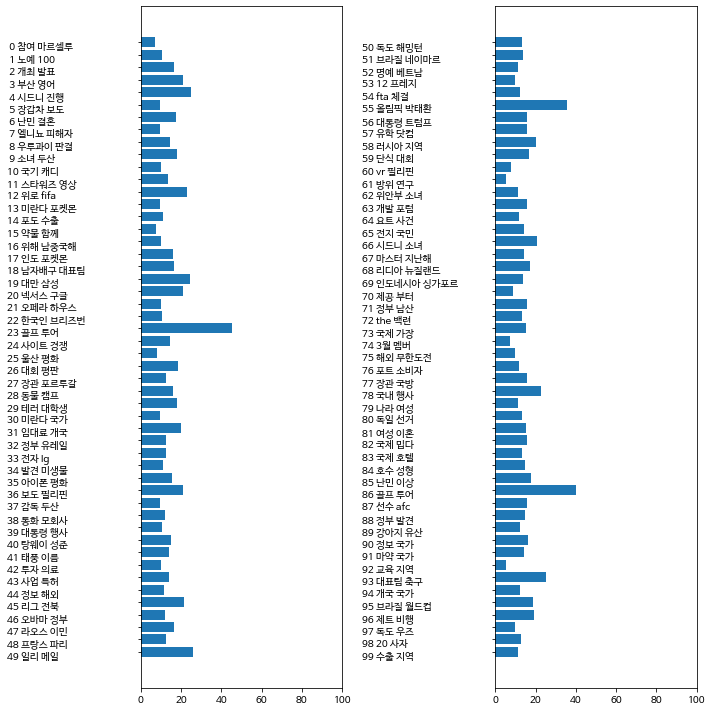

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [ ]:
# 연습

In [ ]:
list_doc = ["나는 학교에 갑니다.",
      "우리는 학교에서 공부를 합니다.",
      "학교에서는 운동도 합니다.",
      "지금은 골프하기에 아주 좋은 날씨입니다.",
      "축구를 학교에서 시청하기도 합니다.",
      "공부를 열시히 해서 좋은 데이터 엔지니어가 될 것입니다.",
      "학교에서는 많은 친구를 사귑니다."]

twitter = Twitter()
results = []
for line in list_doc:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)


/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
vect = CountVectorizer(max_features=10)
X = vect.fit_transform(results)

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [ ]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [ ]:
document_topics

array([[0.10000532, 0.10159057, 0.59680723, 0.10000628, 0.1015906 ],
       [0.0666738 , 0.06711494, 0.73133307, 0.06776324, 0.06711495],
       [0.10000532, 0.10159057, 0.59680723, 0.10000628, 0.1015906 ],
       [0.86616095, 0.03334451, 0.03334046, 0.03380957, 0.03334451],
       [0.06667379, 0.06772955, 0.06955961, 0.06667508, 0.72936197],
       [0.04050659, 0.04001153, 0.04028702, 0.83918334, 0.04001153],
       [0.06667379, 0.72936185, 0.06955969, 0.06667508, 0.06772958]])

In [ ]:
lda.components_.round(2)    # no of topics x number of words

array([[1.2, 0.2, 1.2, 0.2, 0.2, 0.2, 1.2, 1.2, 1.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 1.2, 0.2, 0.2, 0.2, 0.2, 1.2],
       [0.2, 1.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 3.2],
       [0.2, 1.2, 0.2, 1.2, 0.2, 0.2, 0.2, 1.2, 1.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2, 1.2, 0.2, 0.2, 0.2, 1.2]])

In [ ]:
feature_names = np.array(vect.get_feature_names())
N=7
for i in range(0, lda.components_.shape[0]):
    print ("topic {}:".format(i))
    topic_idx = lda.components_.argsort(axis=1)[:,::-1][i]
    print(topic_idx)
    topic_words = [topic_idx[j] for j in range(0,N)]
    print (feature_names[topic_words])

topic 0:
[6 2 0 8 7 9 1 4 5 3]
['아주' '날씨' '골프' '좋다' '이다' '학교' '공부']
topic 1:
[4 9 1 8 7 5 3 6 2 0]
['많다' '학교' '공부' '좋다' '이다' '시청' '데이터']
topic 2:
[9 1 8 7 4 5 3 6 2 0]
['학교' '공부' '좋다' '이다' '많다' '시청' '데이터']
topic 3:
[1 8 7 3 9 4 5 6 2 0]
['공부' '좋다' '이다' '데이터' '학교' '많다' '시청']
topic 4:
[5 9 1 8 7 4 3 6 2 0]
['시청' '학교' '공부' '좋다' '이다' '많다' '데이터']


<BarContainer object of 5 artists>

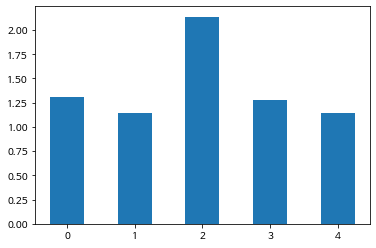

In [ ]:
plt.bar(np.arange(5), np.sum(document_topics, axis=0), width=0.5)

# 연습

In [ ]:
2/0

ZeroDivisionError: ignored

In [ ]:
try:
    for i in range(10,-1,-1):
        print (10 // i)
except ZeroDivisionError:
    print("divide-by-zero error.")
finally:
    print("Done...")

1
1
1
1
1
2
2
3
5
10
divide-by-zero error.
Done...


In [ ]:
list(range(10,-1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [ ]:
a ,b = 3, 5
print(("{:<8}" * a).format(*range(3)))

0       1       2       
